**Лабораторная работа №4. Реализация приложения по распознаванию номеров домов.**


**Данные:** Набор изображений из Google Street View с изображениями номеров домов, содержащий 10 классов, соответствующих цифрам от 0 до 9.
73257 изображений цифр в обучающей выборке;
26032 изображения цифр в тестовой выборке;
531131 изображения, которые можно использовать как дополнение к обучающей выборке;

*В двух форматах:*
*   Оригинальные изображения с выделенными цифрами;
*   Изображения размером 32 × 32, содержащих одну цифру;



Данные *первого формата* можно скачать по ссылкам:
*   http://ufldl.stanford.edu/housenumbers/train.tar.gz (обучающая выборка);
*   http://ufldl.stanford.edu/housenumbers/test.tar.gz (тестовая выборка);
*   http://ufldl.stanford.edu/housenumbers/extra.tar.gz (дополнительные данные);

Данные *второго формата* можно скачать по ссылкам:
*   http://ufldl.stanford.edu/housenumbers/train_32x32.mat (обучающая выборка);
*   http://ufldl.stanford.edu/housenumbers/test_32x32.mat (тестовая выборка);
*   http://ufldl.stanford.edu/housenumbers/extra_32x32.mat (дополнительные данные);

Описание данных на английском языке доступно по ссылке:
*   http://ufldl.stanford.edu/housenumbers/



In [15]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers
from tensorflow.keras.utils import to_categorical
from scipy.io import loadmat
import tensorflow as tf
from google.colab import files

print(tf.version.VERSION)

1.15.0


**Задание 1.**
Реализуйте глубокую нейронную сеть (полносвязную или сверточную) и обучите ее на синтетических данных (например, наборы MNIST (http://yann.lecun.com/exdb/mnist/) или notMNIST).
Ознакомьтесь с имеющимися работами по данной тематике: англоязычная статья (http://static.googleusercontent.com/media/research.google.com/en//pubs/archive/42241.pdf), видео на YouTube (https://www.youtube.com/watch?v=vGPI_JvLoN0).



In [0]:
def showImages(trainDataset):
  plt.subplot(221)
  plt.imshow(trainDataset[0], cmap=plt.get_cmap('gray'))
  plt.subplot(222)
  plt.imshow(trainDataset[1], cmap=plt.get_cmap('gray'))
  plt.subplot(223)
  plt.imshow(trainDataset[2], cmap=plt.get_cmap('gray'))
  plt.subplot(224)
  plt.imshow(trainDataset[3], cmap=plt.get_cmap('gray'))
  plt.show()

11493376/11490434 [==============================] - 0s 0us/step


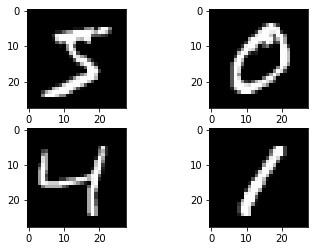

In [5]:
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()
showImages(xTrain)

In [6]:
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [0]:
def largerModel(num_classes):
	model = tf.keras.models.Sequential([
		  tf.keras.layers.Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'),
			tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
			tf.keras.layers.Conv2D(15, (3, 3), activation='relu'),
			tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
			tf.keras.layers.Dropout(0.2),
			tf.keras.layers.Flatten(),
			tf.keras.layers.Dense(128, activation='relu'),
			tf.keras.layers.Dense(50, activation='relu'),
			tf.keras.layers.Dense(num_classes, activation='softmax')
	])

	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

def reshapeDataset(x, y):
  x = x / 255
  x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)
  y = to_categorical(y)
  return x, y

In [8]:
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()
xTrain, yTrain = reshapeDataset(xTrain, yTrain)
xTest, yTest = reshapeDataset(xTest, yTest)

def trainModel(xTrain, yTrain, xTest, yTest):
  num_classes = yTrain.shape[1]
  model = largerModel(num_classes)

  model.fit(xTrain, yTrain, epochs=10, validation_data=(xTest, yTest))

  scores = model.evaluate(xTest, yTest, verbose=0)
  print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

trainModel(xTrain, yTrain, xTest, yTest)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 263us/sample - loss: 0.1580 - acc: 0.9513 - val_loss: 0.0554 - val_acc: 0.9806
Epoch 2/10
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0519 - acc: 0.9843 - val_loss: 0.0357 - val_acc: 0.9887
Epoch 3/10
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0378 - acc: 0.9880 - val_loss: 0.0351 - val_acc: 0.9902
Epoch 4/10
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0301 - acc: 0.9909 - val_loss: 0.0299 - val_acc: 0.9899
Epoch 5/10
60000/60000 [==============================] - 10s 167us/sample - loss: 0.0242 - acc: 0.9923 - val_loss: 0.0447 - val_acc: 0.9856
Epoch 6/10
60000/60000 [==============================] - 10s 167us/sample - loss: 0.0214 - acc: 0.9933 - val_loss: 0.0335 - val_acc: 0.9893
Epoch 7/10
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0165 - acc: 0.9948 

**Задание 2.**
После уточнения модели на синтетических данных попробуйте обучить ее на реальных данных (набор Google Street View). Что изменилось в модели?


In [0]:
def getDataset(file):
  matfile = loadmat(file)
  x = matfile['X'] / 255
  y = matfile['y']
  y = to_categorical(y)
  return x, y

xTrain, yTrain = getDataset("/content/drive/My Drive/Collab Data/train_32x32.mat")
xTest, yTest = getDataset("/content/drive/My Drive/Collab Data/test_32x32.mat")

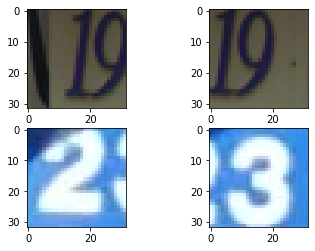

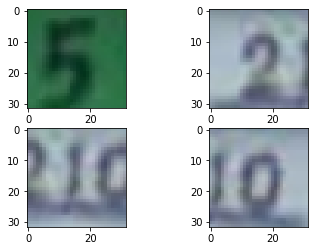

In [10]:
def showGoogleImages(trainDataset):
  plt.subplot(221)
  plt.imshow(trainDataset[:,:,:,0], cmap=plt.get_cmap('gray'))
  plt.subplot(222)
  plt.imshow(trainDataset[:,:,:,1], cmap=plt.get_cmap('gray'))
  plt.subplot(223)
  plt.imshow(trainDataset[:,:,:,2], cmap=plt.get_cmap('gray'))
  plt.subplot(224)
  plt.imshow(trainDataset[:,:,:,3], cmap=plt.get_cmap('gray'))
  plt.show()

showGoogleImages(xTrain)
showGoogleImages(xTest)

In [11]:
xTrain, xTest = xTrain.T, xTest.T
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(73257, 3, 32, 32) (73257, 11)
(26032, 3, 32, 32) (26032, 11)


In [12]:
def largerGoogleModel(numClasses):
  model = tf.keras.models.Sequential([
		  tf.keras.layers.BatchNormalization(input_shape=(3, 32, 32)),
      tf.keras.layers.Conv2D(64, 7, activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(128, 5, activation='relu', padding='same'),

      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
      tf.keras.layers.Dropout(0.5),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(50, activation='relu'),
      tf.keras.layers.Dense(numClasses, activation='softmax')
	])
  
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model


def trainGoogleModel(xTrain, yTrain, xTest, yTest):
  print(xTrain.shape, yTrain.shape, xTest.shape, yTest.shape)
  numClasses = yTrain.shape[1]
  googleModel = largerGoogleModel(numClasses)
  googleModel.fit(xTrain, yTrain, validation_data=(xTest, yTest), epochs=15, batch_size=200)

  scores = googleModel.evaluate(xTest, yTest, verbose=0)
  print("Large CNN Error: %.2f%%" % (100-scores[1]*100))
  return googleModel

googleModel = trainGoogleModel(xTrain, yTrain, xTest, yTest)

(73257, 3, 32, 32) (73257, 11) (26032, 3, 32, 32) (26032, 11)
Train on 73257 samples, validate on 26032 samples
Epoch 1/15
73257/73257 [==============================] - 13s 177us/sample - loss: 1.9820 - acc: 0.3016 - val_loss: 1.4408 - val_acc: 0.5089
Epoch 2/15
73257/73257 [==============================] - 12s 164us/sample - loss: 1.0644 - acc: 0.6521 - val_loss: 0.8695 - val_acc: 0.7308
Epoch 3/15
73257/73257 [==============================] - 12s 167us/sample - loss: 0.7178 - acc: 0.7749 - val_loss: 0.7121 - val_acc: 0.7794
Epoch 4/15
73257/73257 [==============================] - 12s 168us/sample - loss: 0.5861 - acc: 0.8164 - val_loss: 0.6446 - val_acc: 0.8028
Epoch 5/15
73257/73257 [==============================] - 12s 167us/sample - loss: 0.5014 - acc: 0.8431 - val_loss: 0.5956 - val_acc: 0.8158
Epoch 6/15
73257/73257 [==============================] - 12s 166us/sample - loss: 0.4455 - acc: 0.8617 - val_loss: 0.5799 - val_acc: 0.8239
Epoch 7/15
73257/73257 [==================

[7.3576915e-11 1.2531391e-03 1.4728739e-02 6.2116849e-01 1.6494209e-02
 2.5953001e-01 1.3081673e-02 3.6232840e-02 1.0242596e-03 3.6485519e-02
 1.1432360e-06]


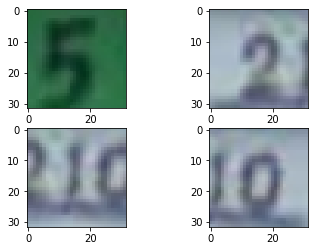

In [13]:
print(googleModel.predict(xTest)[0])
showGoogleImages(xTest.T)

**Задание 3.**
Сделайте множество снимков изображений номеров домов с помощью смартфона на ОС iOS. Также можно использовать библиотеки OpenCV, Simple CV или Pygame для обработки изображений с общедоступных камер видеонаблюдения (например, https://www.earthcam.com/).
Пример использования библиотеки TensorFlow на смартфоне можете воспользоваться демонстрационным приложением от Google (https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/ios).


In [0]:
googleModel.save('/content/drive/My Drive/Collab Data/NumbersModel.h5')

In [16]:
converter = tf.lite.TFLiteConverter.from_keras_model_file('/content/drive/My Drive/Collab Data/NumbersModel.h5') 
model = converter.convert()
file = open('NumbersModel.tflite' , 'wb') 
file.write(model)
files.download('NumbersModel.tflite')

INFO:tensorflow:Froze 24 variables.
INFO:tensorflow:Converted 24 variables to const ops.


**Задание 4.**
Реализуйте приложение для ОС iOS, которое может распознавать цифры в номерах домов, используя разработанный ранее классификатор. Какова доля правильных классификаций?
